## **Objectives**
In this notebook we will use 'seeds' dataset found from https://archive.ics.uci.edu/dataset/236/seeds :
1. We want to perform short EDA on the dataset
2. We want to perform K-Means clustering

## **About the dataset**
The dataset contains measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

The UCI documentation of the dataset stated that the data contains no missing values.

First we will load the necessary library and set random seeds.



In [3]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)
library(corrplot)
library(hopkins)
library(factoextra)
library(cluster)
library(NbClust)
library(ggplot2)
library(gridExtra)
library(fpc)
library(clValid)
library(cluster)
set.seed(123)

## **1. EDA**

First we want to load the dataset and confirm for any missing values.

In [8]:
data <- read.table("seeds_dataset.txt", header = TRUE)
head(data)

,X15.26,X14.84,X0.871,X5.763,X3.312,X2.221,X5.22,X1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1


In [17]:
colSums(is.na(data))

X15.26 X14.84 X0.871 X5.763 X3.312 X2.221  X5.22     X1 
     0      0      0      0      0      0      0      0

In [9]:
str(data)

'data.frame':	209 obs. of  8 variables:
 $ X15.26: num  14.9 14.3 13.8 16.1 14.4 ...
 $ X14.84: num  14.6 14.1 13.9 15 14.2 ...
 $ X0.871: num  0.881 0.905 0.895 0.903 0.895 ...
 $ X5.763: num  5.55 5.29 5.32 5.66 5.39 ...
 $ X3.312: num  3.33 3.34 3.38 3.56 3.31 ...
 $ X2.221: num  1.02 2.7 2.26 1.35 2.46 ...
 $ X5.22 : num  4.96 4.83 4.8 5.17 4.96 ...
 $ X1    : int  1 1 1 1 1 1 1 1 1 1 ...


We check how many different type of seeds are contained in the dataset.

In [22]:
table(data$X1)


 1  2  3 
69 70 70 

From the results above we can see that the original data has 3 classes. We are going to exclude 'X1' from the dataset and create a new subset for it.

In [12]:
data_subset <- data[, -ncol(data)]
head(data_subset)

,X15.26,X14.84,X0.871,X5.763,X3.312,X2.221,X5.22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219


In [13]:
summary(data_subset)

     X15.26          X14.84          X0.871           X5.763     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.26   1st Qu.:13.45   1st Qu.:0.8567   1st Qu.:5.262  
 Median :14.34   Median :14.29   Median :0.8735   Median :5.520  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.628  
 3rd Qu.:17.32   3rd Qu.:15.73   3rd Qu.:0.8879   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
     X3.312          X2.221           X5.22      
 Min.   :2.630   Min.   :0.7651   Min.   :4.519  
 1st Qu.:2.941   1st Qu.:2.5870   1st Qu.:5.045  
 Median :3.232   Median :3.6000   Median :5.224  
 Mean   :3.258   Mean   :3.7073   Mean   :5.409  
 3rd Qu.:3.562   3rd Qu.:4.7730   3rd Qu.:5.877  
 Max.   :4.033   Max.   :8.4560   Max.   :6.550  

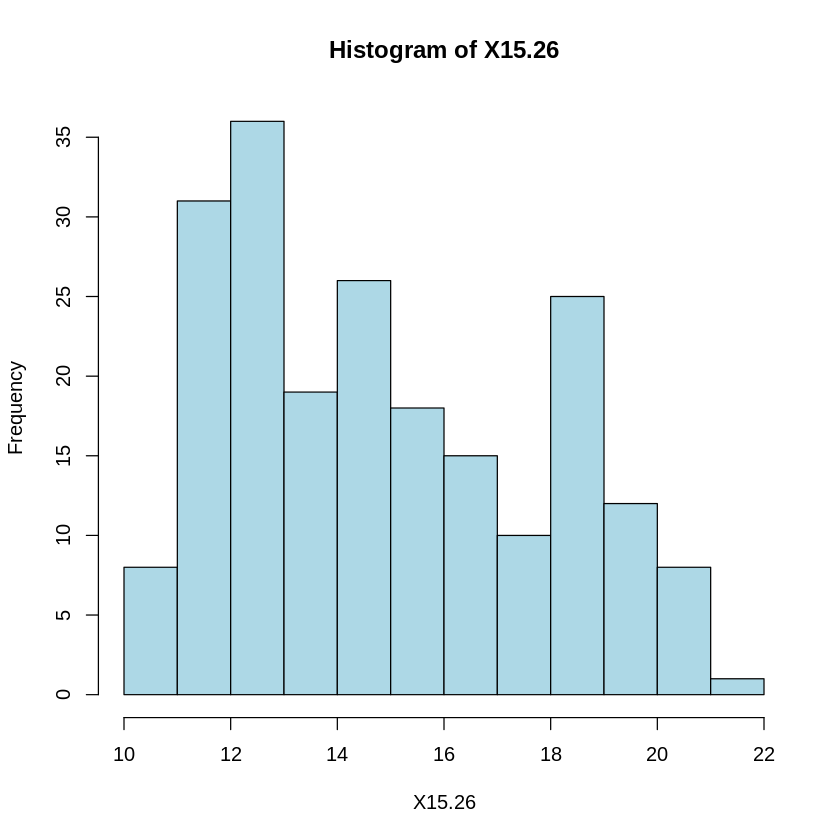

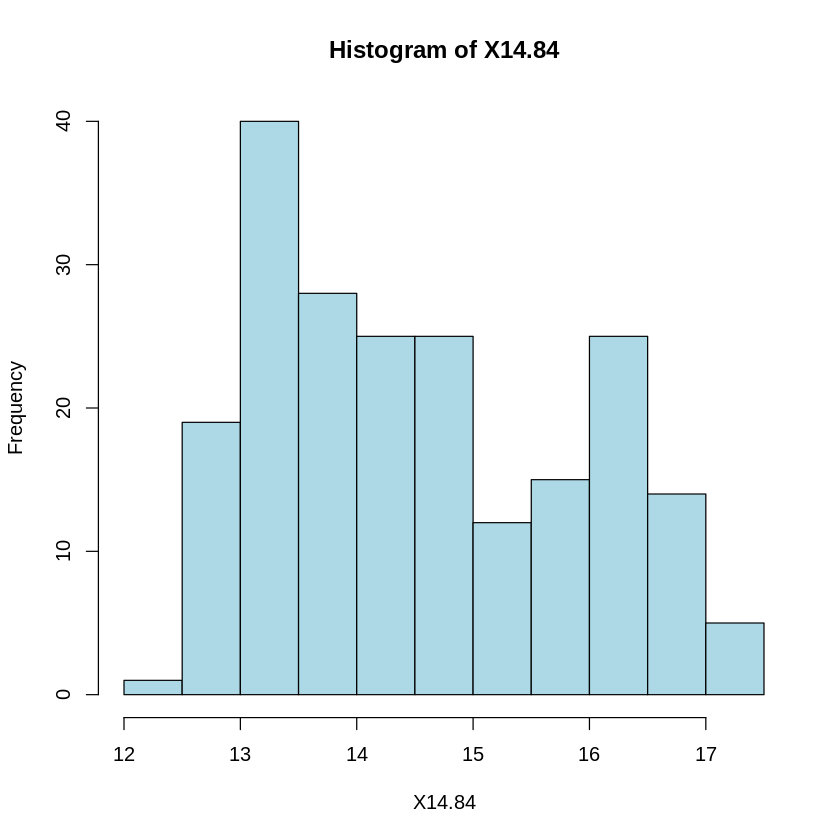

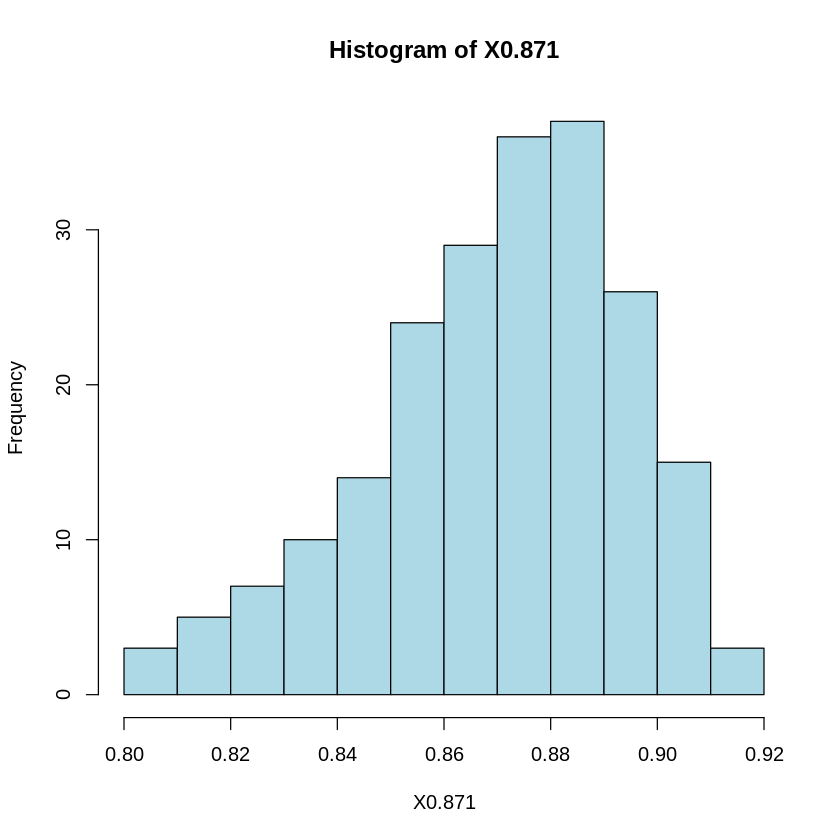

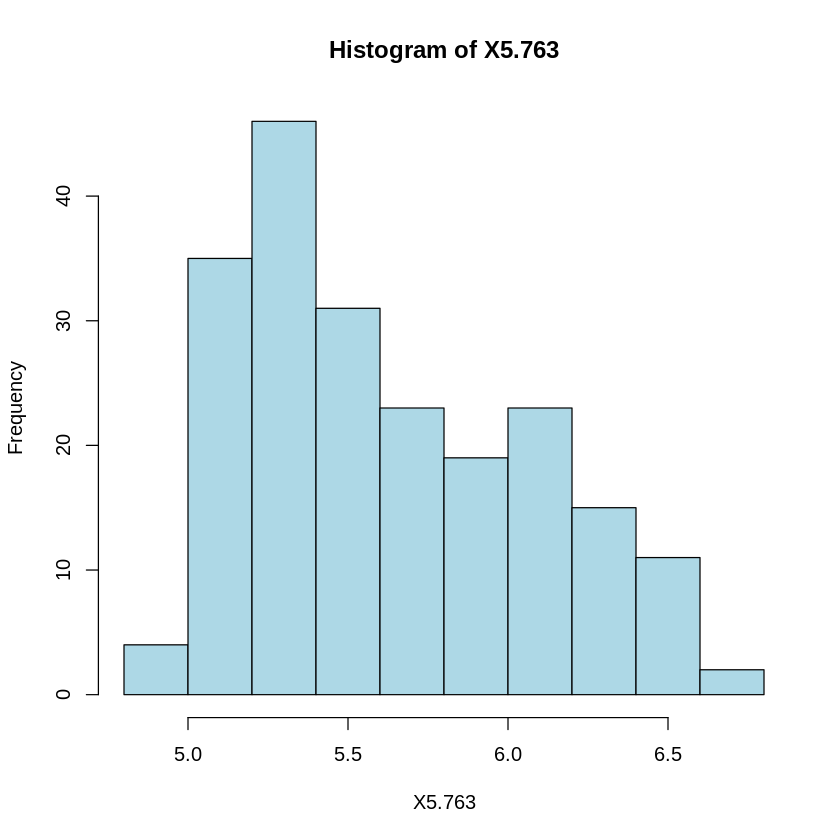

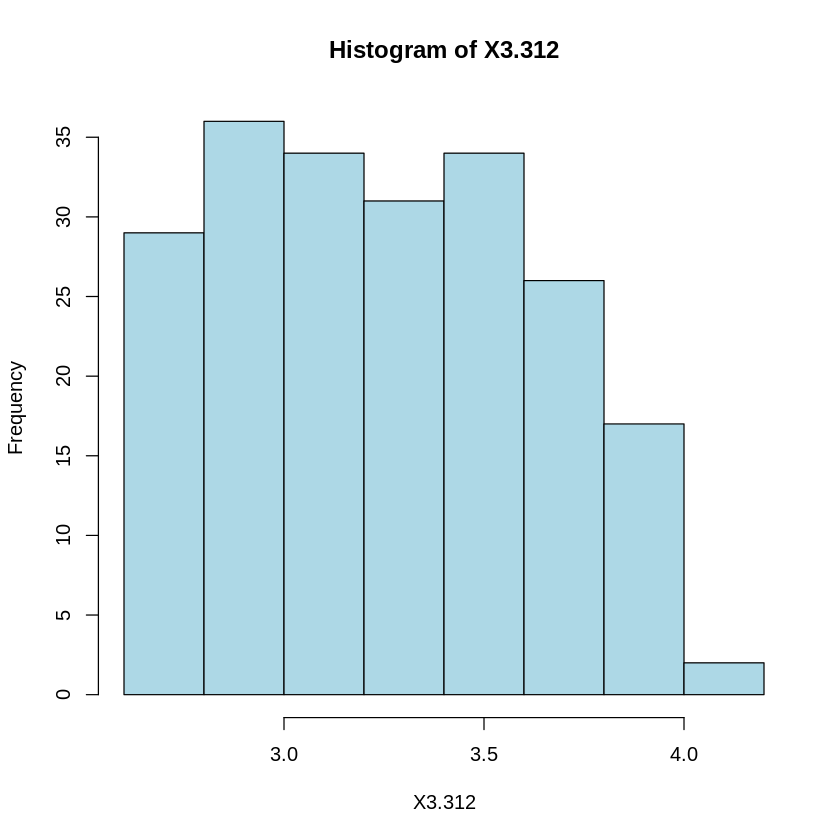

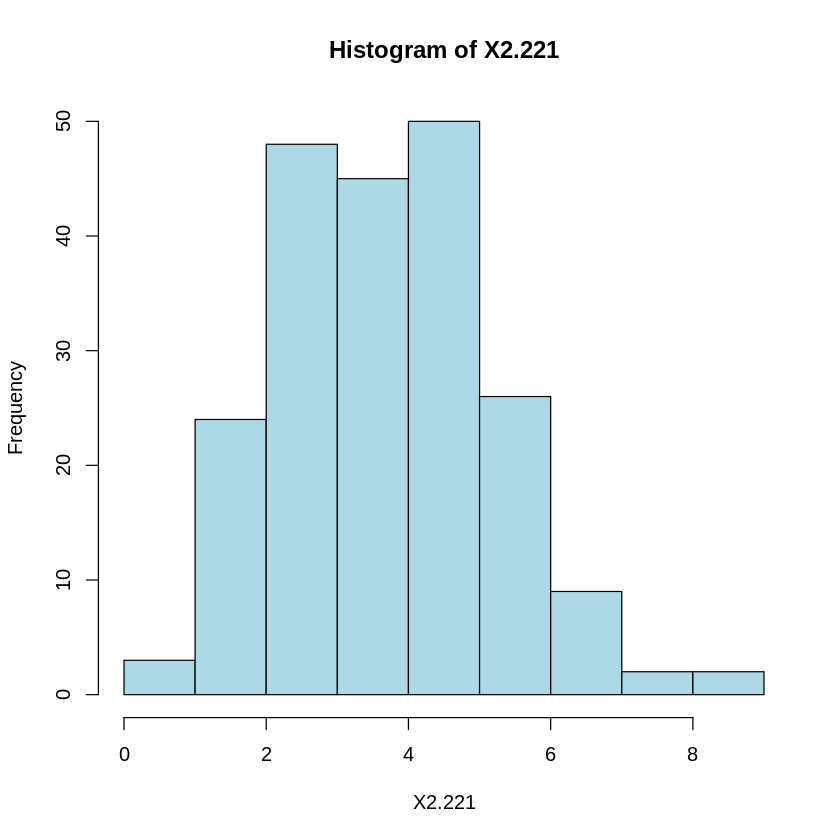

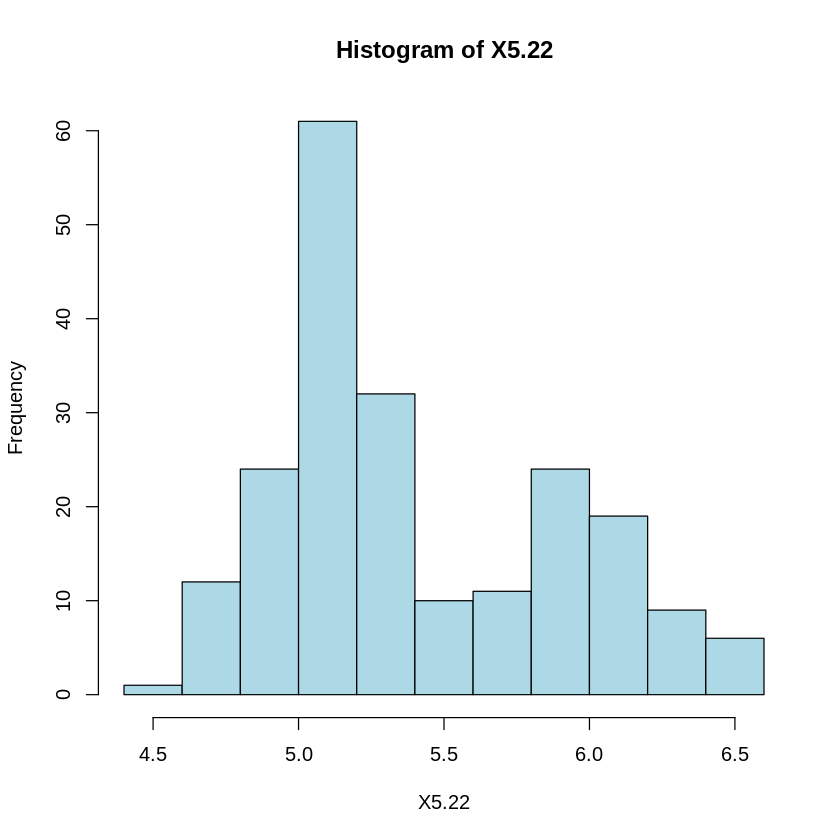

In [16]:
for(i in 1:ncol(data_subset)) {
  hist(data_subset[[i]], main = paste("Histogram of", colnames(data_subset)[i]), xlab = colnames(data_subset)[i], col = "lightblue")
}

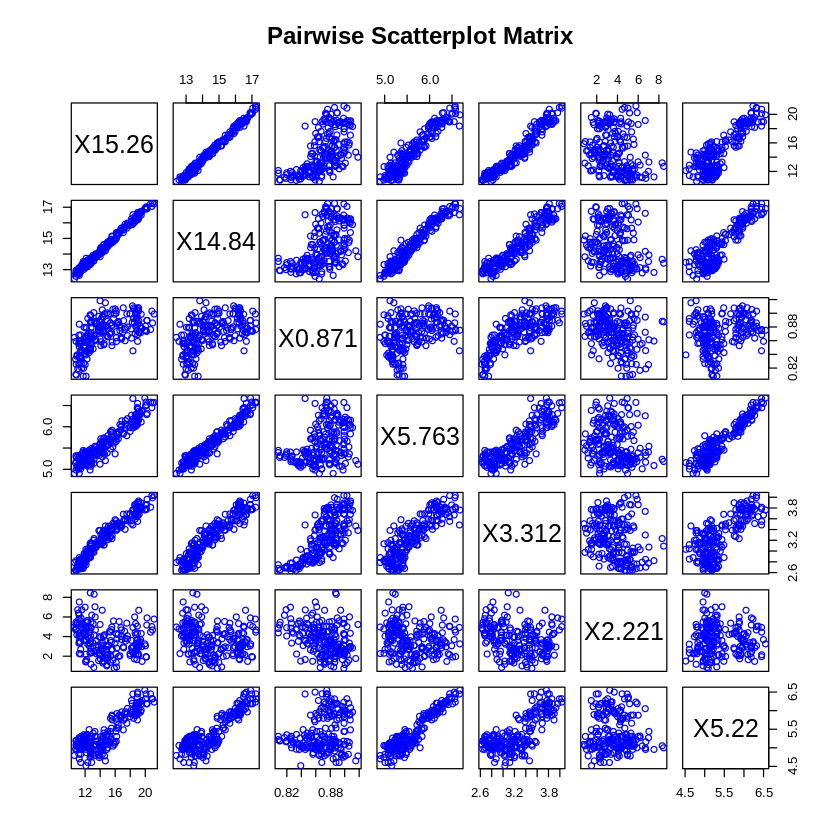

In [18]:
pairs(data_subset, main = "Pairwise Scatterplot Matrix", col = "blue")

In [19]:
cor_matrix = cor(data_subset)
print(cor_matrix)

           X15.26     X14.84     X0.871     X5.763     X3.312      X2.221
X15.26  1.0000000  0.9943529  0.6083178  0.9500348  0.9707678 -0.22944735
X14.84  0.9943529  1.0000000  0.5293023  0.9724320  0.9448336 -0.21685286
X0.871  0.6083178  0.5293023  1.0000000  0.3679965  0.7616711 -0.33224447
X5.763  0.9500348  0.9724320  0.3679965  1.0000000  0.8604405 -0.17056196
X3.312  0.9707678  0.9448336  0.7616711  0.8604405  1.0000000 -0.25798121
X2.221 -0.2294474 -0.2168529 -0.3322445 -0.1705620 -0.2579812  1.00000000
X5.22   0.8642996  0.8915922  0.2269048  0.9338999  0.7496915 -0.01292354
             X5.22
X15.26  0.86429955
X14.84  0.89159222
X0.871  0.22690481
X5.763  0.93389992
X3.312  0.74969146
X2.221 -0.01292354
X5.22   1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



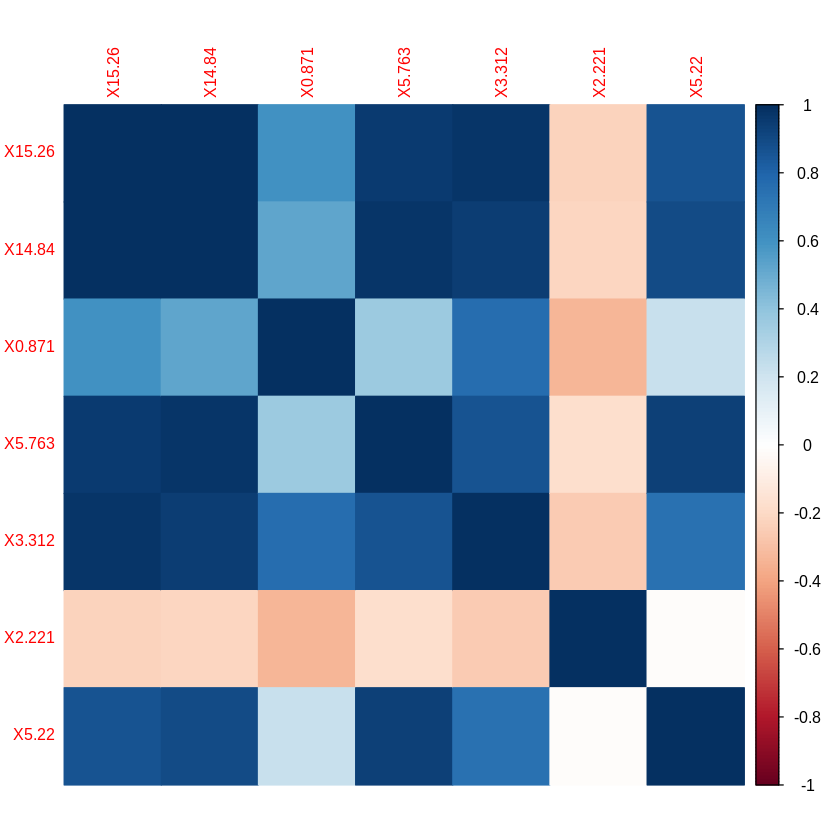

In [20]:
# install.packages("corrplot")
library(corrplot)
corrplot(cor_matrix, method = "color", tl.cex = 0.8)


From the scatterplot and the correlation coefficient heatmap, we can observe that there are variables that have strong positive linear correlation with each other.

## **2. K-Means Clustering**

We can observe from the first several rows that some columns have larger magnitude compared to the others. For this reason, it is reasonable to conclude that the dataset has different units for the variable. Because of this reason, we need to scale the dataset before performing any further clustering. First I need to ensure all the data types are numerical.

In [37]:
str(data_subset)

'data.frame':	209 obs. of  7 variables:
 $ X15.26: num  14.9 14.3 13.8 16.1 14.4 ...
 $ X14.84: num  14.6 14.1 13.9 15 14.2 ...
 $ X0.871: num  0.881 0.905 0.895 0.903 0.895 ...
 $ X5.763: num  5.55 5.29 5.32 5.66 5.39 ...
 $ X3.312: num  3.33 3.34 3.38 3.56 3.31 ...
 $ X2.221: num  1.02 2.7 2.26 1.35 2.46 ...
 $ X5.22 : num  4.96 4.83 4.8 5.17 4.96 ...


In [23]:
data_scaled = scale(data_subset)
head(data_scaled)

X15.26,X14.84,X0.871,X5.763,X3.312,X2.221,X5.22
0.01181184,0.009211526,0.4264701,-0.16640797,0.197174061,-1.7884925,-0.9197628
-0.19048234,-0.357494925,1.4354986,-0.75871175,0.207739214,-0.6705510,-1.1857596
-0.34477451,-0.472090690,1.0344203,-0.68439226,0.318673319,-0.9631711,-1.2263698
0.44382992,0.330079670,1.3679486,0.06781101,0.802029062,-1.5643722,-0.4750811
-0.15962390,-0.265818312,1.0175328,-0.54476172,0.141707008,-0.8281668,-0.9197628
-0.05333374,-0.051906216,0.3758076,-0.14613902,0.001718733,-0.0806557,-0.3857386


We calculate **Hopkins statistics** to assess the dataset's clustering tendency.

In [24]:
hopkins(data_scaled)

[1] 0.9995213

The hopkins statistics is very close to 1 meaning the data is clusterable. Now I can perform K-Means with 3 clusters.

### **Determining optimum number of clusters**

To determine the optimum number of cluster, we will use elbow method, silhouette method, gap statistics, and several other measures.

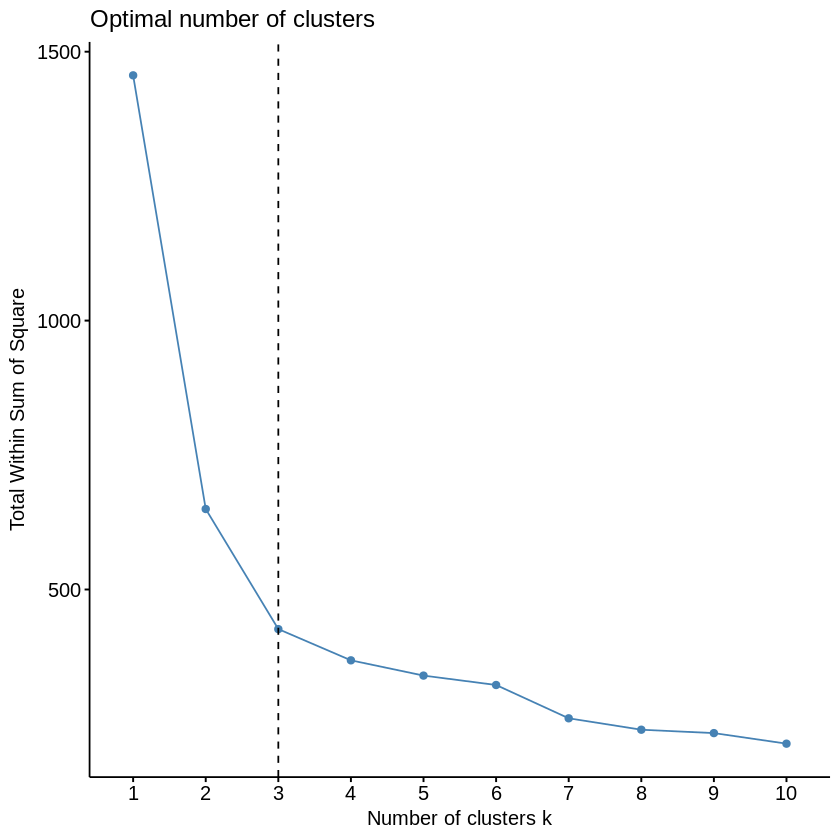

In [ ]:
fviz_nbclust(data_scaled, kmeans, method="wss") + geom_vline(xintercept=3, linetype=2)

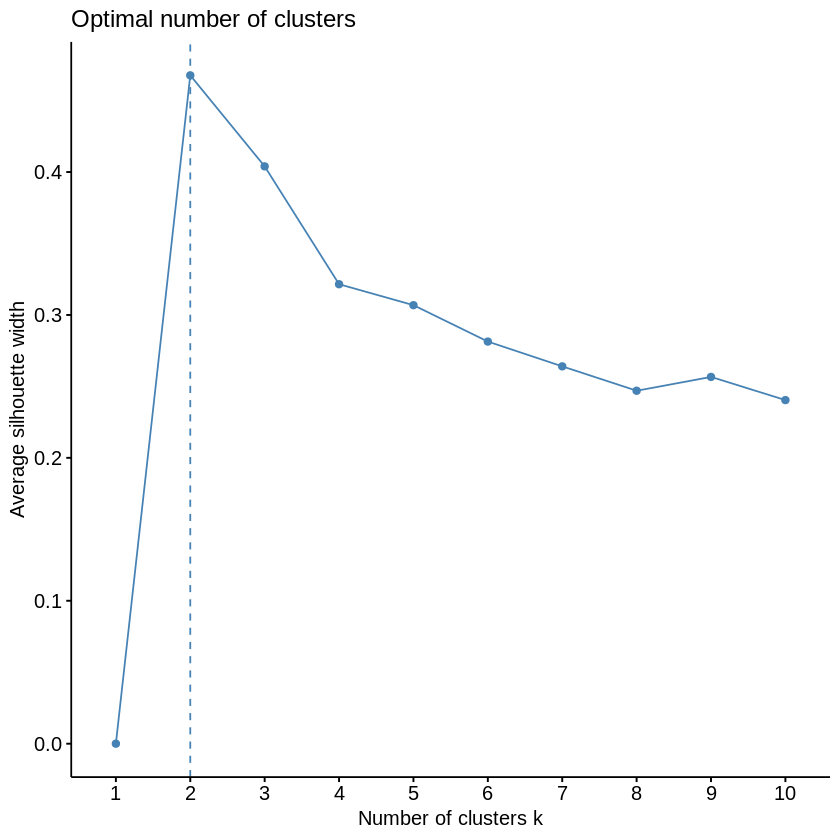

In [ ]:
fviz_nbclust(data_scaled, kmeans, method="silhouette")

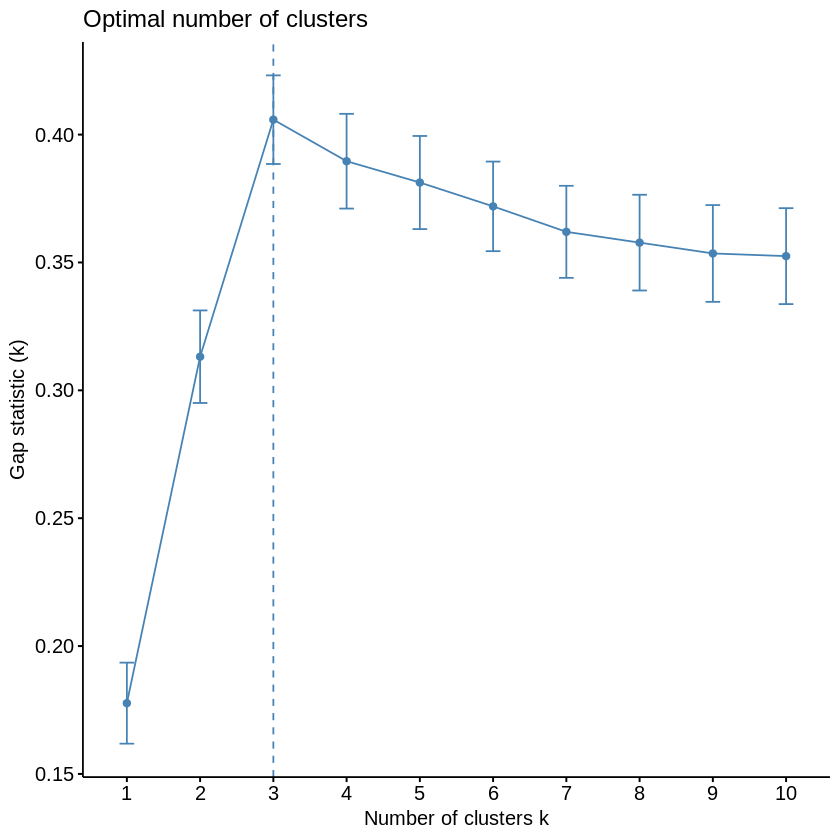

In [ ]:
fviz_nbclust(data_scaled, kmeans, nstart=25, method="gap_stat", nboot=50)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


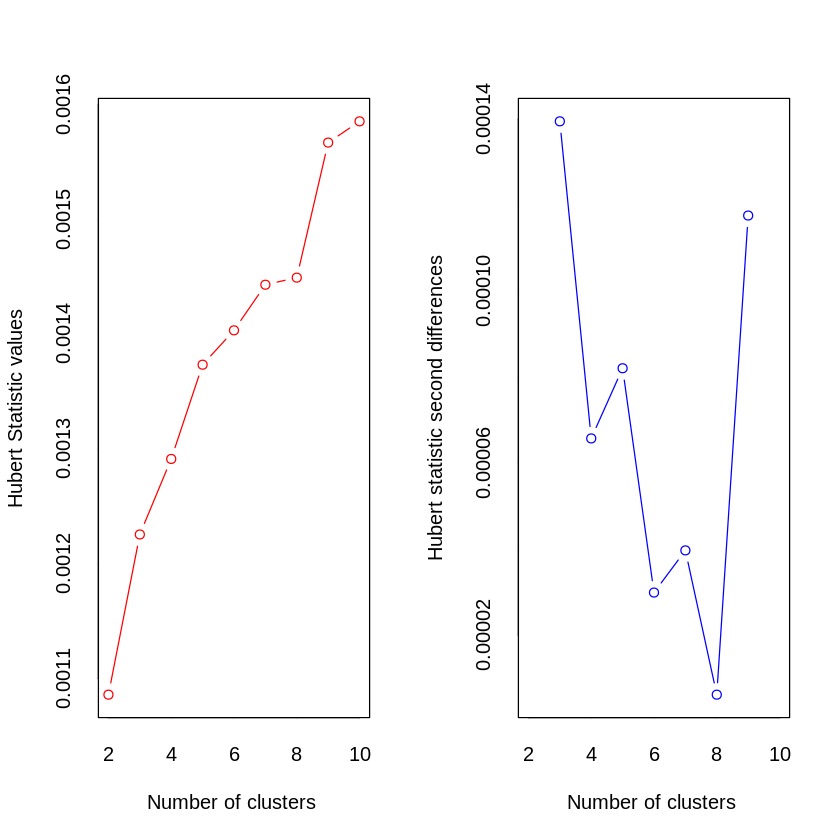

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 10 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


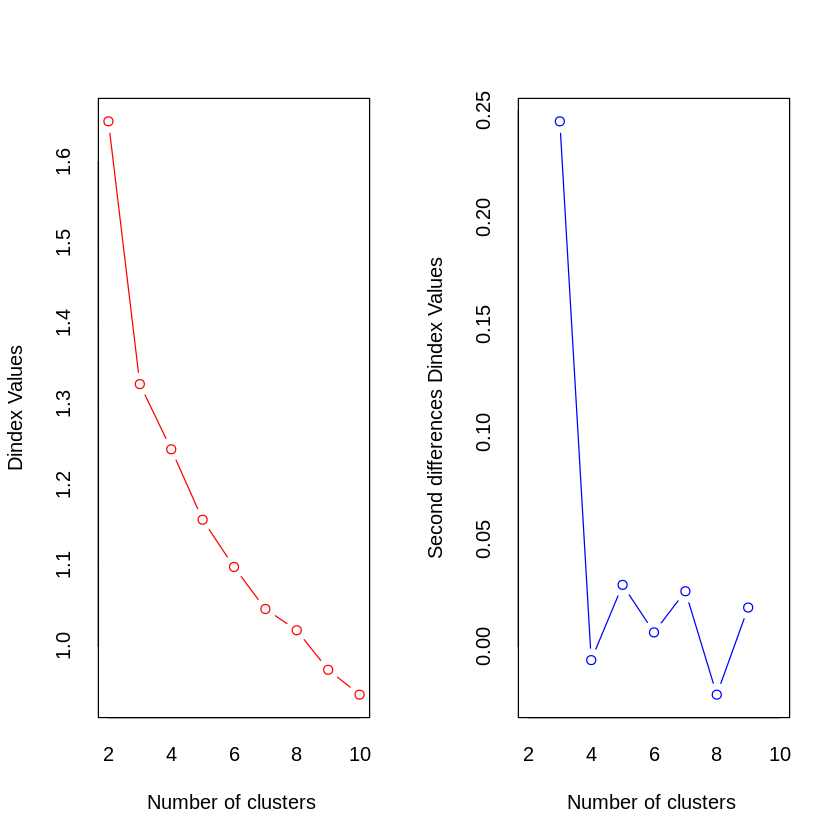

In [ ]:
library("NbClust")
nb <- NbClust(data_scaled, distance = "euclidean", min.nc = 2,
max.nc = 10, method = "kmeans")

In [ ]:
summary(clValid(data_scaled, 2:8, clMethods="kmeans", validation="internal"))

Warning message in clValid(data_scaled, 2:8, clMethods = "kmeans", validation = "internal"):
“rownames for data not specified, using 1:nrow(data)”



Clustering Methods:
 kmeans 

Cluster sizes:
 2 3 4 5 6 7 8 

Validation Measures:
                            2        3        4        5        6        7        8
                                                                                   
kmeans Connectivity   17.0667  39.8508  68.3567  73.0206  96.7603  97.7032 102.7917
       Dunn            0.0869   0.0826   0.0799   0.0813   0.0813   0.0985   0.0613
       Silhouette      0.4677   0.4021   0.3560   0.2938   0.2765   0.2829   0.2683

Optimal Scores:

             Score   Method Clusters
Connectivity 17.0667 kmeans 2       
Dunn          0.0985 kmeans 7       
Silhouette    0.4677 kmeans 2       



From the plot above, elbow method and gap statistics recommend 3 clusters while silhouette width recommend 2 clusters. The NbClust() funtion provides 30 indices for determining the relevant number of clusters. The majority of the indices recommend 2 clusters (10 indices) or 3 clusters (10 indices).

In [26]:
km.res = kmeans(data_scaled, centers = 3, nstart = 25)
print(km.res)

K-means clustering with 3 clusters of sizes 71, 67, 71

Cluster means:
      X15.26     X14.84     X0.871     X5.763      X3.312      X2.221
1 -1.0216801 -0.9942815 -0.9815554 -0.8816894 -1.08087462  0.71156335
2  1.2514202  1.2571081  0.5577894  1.2336958  1.16002217 -0.04981545
3 -0.1592376 -0.1920036  0.4551908 -0.2825024 -0.01379419 -0.66455440
       X5.22
1 -0.6124694
2  1.2847651
3 -0.5999145

Clustering vector:
  [1] 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 3 3 3 3 3 1 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 3 2 3 3 2 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 137.6279 139.1091 149.5701
 (between_SS / total_SS =  70.7 %)

Available com

In [27]:
print(km.res$tot.withinss)

[1] 426.3072


Now we want to plot the visualize the results of our K-Means clustering. Since the data is multidimensional, we will apply PCA and use the first two principal components to do so.  

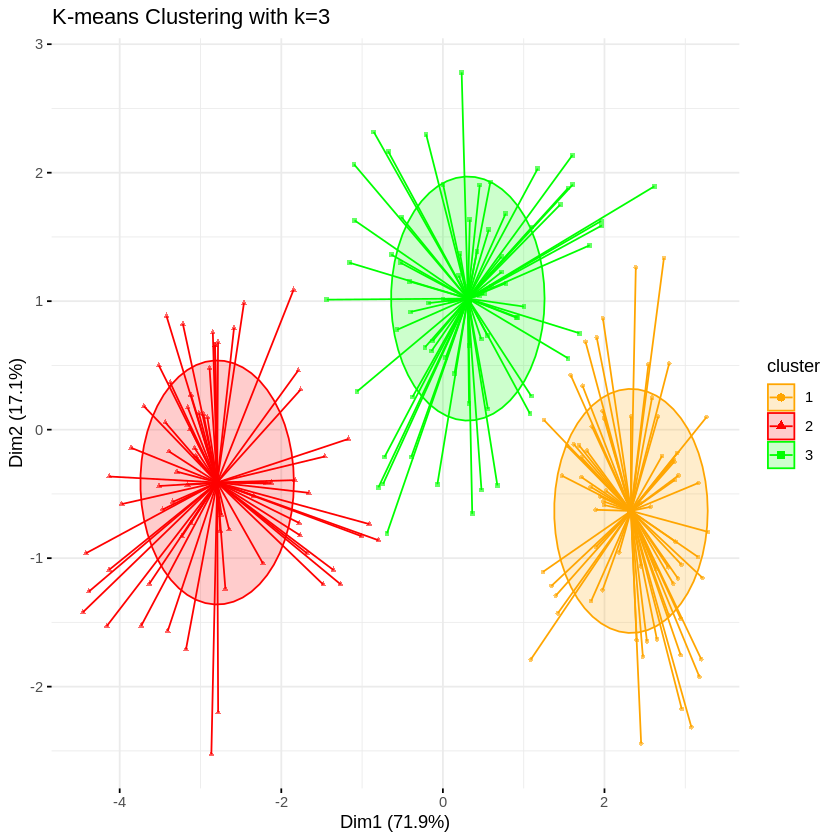

In [28]:
create_cluster_plot <- function(km_res, data, palette, title) {
  fviz_cluster(km_res,
               data = data,
               palette = palette,
               ellipse.type = "euclid",
               star.plot = TRUE,
               repel = TRUE,
               ggtheme = theme_minimal(),
               geom = "point",
               pointsize = 1,
               alpha = 0.6
  ) + ggtitle(title)
}

create_cluster_plot(km.res, data_scaled, c('orange', 'red', 'green'), "K-means Clustering with k=3")

Additional note: the first two principal components captures 89% of total variance of the original dataset. Now we are going to check the silhouette width of each observation when clustered by K-Means with 3 clusters.

We want to specifically find out if any of the observations are mis-clustered.

$avg.width
[1] 0.401368

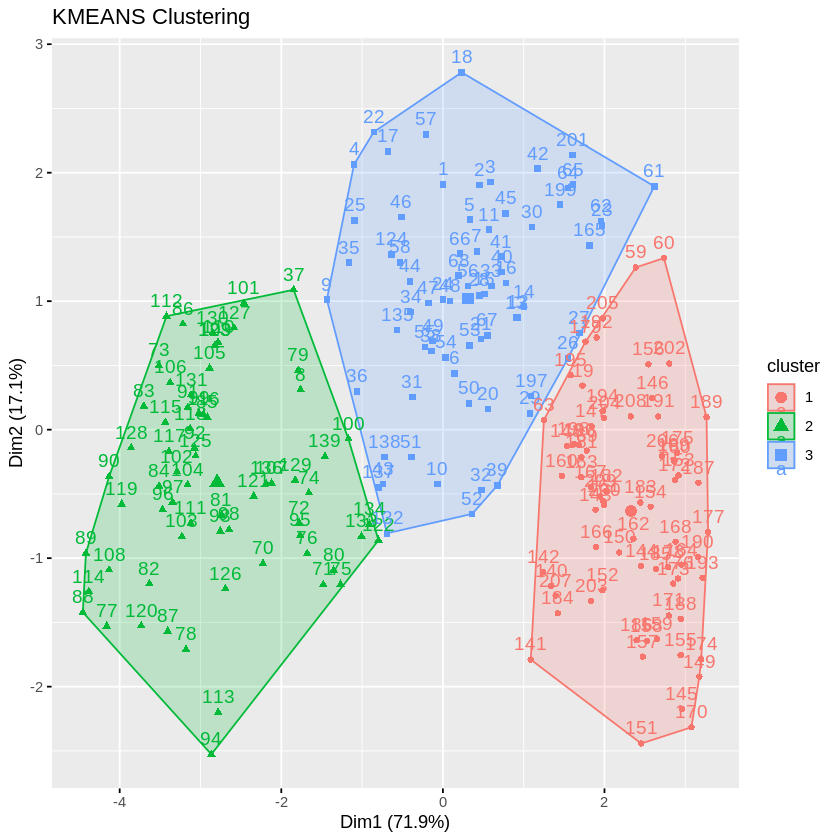

In [29]:
silhouette_results = (eclust(data_scaled, k=3, FUNcluster = "kmeans", hc_metric = "euclidean")$silinfo)
silhouette_results[3]

In [30]:
sw = silhouette_results$widths
summary(sw$sil_width)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.008633  0.301704  0.463423  0.401368  0.529200  0.642811 

In [31]:
sum(sw$sil_width < 0)

[1] 1

1 observation is not clustered correctly because of its negative silhouette score.